# NetworkX
Testing networkx basic functionalities

In [ ]:
# Datasets: https://snap.stanford.edu/data/

In [3]:
import networkx as nx

g = nx.Graph()
g .add_edge('a','b',weight=0.1)
g .add_edge('b','c',weight=1.5)
g .add_edge('a','c',weight=1.0)
g .add_edge('c','d',weight=2.2)
print(nx.shortest_path(g,'b','d'))
print(nx.shortest_path(g,'b','d', weight='weight'))

['b', 'c', 'd']
['b', 'a', 'c', 'd']


In [269]:
help(nx.algorithms)

Help on package networkx.algorithms in networkx:

NAME
    networkx.algorithms

PACKAGE CONTENTS
    approximation (package)
    assortativity (package)
    bipartite (package)
    boundary
    bridges
    centrality (package)
    chains
    chordal
    clique
    cluster
    coloring (package)
    communicability_alg
    community (package)
    components (package)
    connectivity (package)
    core
    covering
    cuts
    cycles
    dag
    distance_measures
    distance_regular
    dominance
    dominating
    efficiency
    euler
    flow (package)
    graphical
    hierarchy
    hybrid
    isolate
    isomorphism (package)
    link_analysis (package)
    link_prediction
    lowest_common_ancestors
    matching
    minors
    mis
    node_classification (package)
    operators (package)
    planarity
    reciprocity
    richclub
    shortest_paths (package)
    similarity
    simple_paths
    smallworld
    smetric
    sparsifiers
    structuralholes
    swap
    threshold
    t

In [247]:
g.add_node(1)
g.add_nodes_from([2,5])
h = nx.path_graph(6)
g.add_nodes_from(h)
g.remove_node(3)
print(g.has_node(3))
print(g.has_edge(1,3))

False
False


Node as any hashable object

In [5]:
import math
g.add_node('string')
g.add_node(math.cos) # cosine function
f = open('temp.txt', 'w') # file handle
g.add_node(f)
print(g.nodes())

['a', 'b', 'c', 'd', 1, 2, 5, 0, 4, 'string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>]


In [13]:
#print(dir(g))
g.add_edge(1,2)
e = (2,3)
g.add_edge(*e) # unpack tuple
g.add_edges_from([(1,2),(1,3)])

print(g.edges)
print(h.edges)
g.add_edges_from(h.edges())
g.remove_edge('a','b')
print(g.edges)

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd'), (1, 2), (1, 3), (2, 3)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[('a', 'c'), ('b', 'c'), ('c', 'd'), (1, 2), (1, 3), (1, 0), (2, 3), (5, 4), (4, 3)]


In [20]:
g.add_edges_from([(1,2),(1,3)])
g.add_node('a')
print(g.number_of_nodes())# g.order()
print(g.order())
print(g.number_of_edges())
print(g.size())
print(g.nodes())
print(g.edges())
print("neighbors of node 1")
print(list(g.neighbors(1)))
print("degree of node 1")
print(g.degree(1))

13
13
9
9
['a', 'b', 'c', 'd', 1, 2, 5, 0, 4, 'string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>, 3]
[('a', 'c'), ('b', 'c'), ('c', 'd'), (1, 2), (1, 3), (1, 0), (2, 3), (5, 4), (4, 3)]
neighbors of node 1
[2, 3, 0]
degree of node 1
3


In [27]:
fruit_dict = {'apple':1, 'orange':[0.12,0.02], 42:True}
print(fruit_dict.keys())
print(fruit_dict.items())
# any graph behaves as a python dict with nodes as primary keys (for access only)
g.add_node(9, time='10am')
print(g.node[9]['time'])
print(g.node[9])
# weight always numeric
print(g['b']['c'])
g['b']['c']['weight'] = 5.0
print(g['b']['c'])

dict_keys(['apple', 'orange', 42])
dict_items([('apple', 1), ('orange', [0.12, 0.02]), (42, True)])
10am
{'time': '10am'}
{'weight': 1.5}
{'weight': 5.0}


In [43]:
g.add_edge(1,9)
for node in sorted(g.nodes(), key=lambda x: g.degree(x)):
    print(node, g.degree(node))
    
g.add_edge(1,3, weight=2.5)
g.add_edge(1,2, weight=1.5)
for n1, n2, attr in g.edges(data=True): # unpacking
    print(n1, n2, attr['weight']) if 'weight' in attr.keys() else print(n1,n2, attr)


string 0
<built-in function cos> 0
<_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'> 0
a 1
b 1
d 1
5 1
0 1
9 1
2 2
4 2
c 3
3 3
1 4
a c {'weight': 1.0}
b c {'weight': 5.0}
c d {'weight': 2.2}
1 2 {'weight': 1.5}
1 3 {'weight': 2.5}
1 0 {}
1 9 {}
2 3 {}
5 4 {}
4 3 {}


In [259]:
# iterating over edges
# sometines more efficient

gg2 = nx.Graph()
gg2.add_path([0,1,2,3])
gg2.add_edges_from([(2,0),(0,3),(1,3)])
#print(list([e for e in gg2.edges_iter()])) #edges_iter has been removed
print(list([e for e in gg2.edges()])) #edges_iter has been removed
print(list((n) for n in gg2.adj))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[0, 1, 2, 3]


In [262]:
### neighbors
neighbors = g[1]
print(neighbors)
ns = list([(n,g[n]) for n in g.nodes()])
print(ns)

{2: {'weight': 1.5}, 0: {}, 9: {}}
[('a', AtlasView({'c': {'weight': 1.0}})), ('b', AtlasView({'c': {'weight': 5.0}})), ('c', AtlasView({'b': {'weight': 5.0}, 'a': {'weight': 1.0}, 'd': {'weight': 2.2}})), ('d', AtlasView({'c': {'weight': 2.2}})), (1, AtlasView({2: {'weight': 1.5}, 0: {}, 9: {}})), (2, AtlasView({1: {'weight': 1.5}})), (5, AtlasView({4: {}})), (0, AtlasView({1: {}})), (4, AtlasView({5: {}})), ('string', AtlasView({})), (<built-in function cos>, AtlasView({})), (<_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>, AtlasView({})), (9, AtlasView({1: {}}))]


Directed graphs

In [51]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)])
print(dg.out_degree(1, weight='weigth'))
print(dg.degree(1, weight='weight'))
print(list(dg.successors(1)))
print(list(dg.predecessors(1)))
# convert directed to undirecte graph (some algorithms will require so)
ndg = dg.to_undirected()
print(ndg.degree(1,weight='weight'))
print(ndg.edges())
print(ndg.successors(1))

1
1.25
[4]
[3]
1.25
[(1, 4), (1, 3)]


AttributeError: 'Graph' object has no attribute 'successors'

In [64]:
print(g.nodes())
print(g.edges())
print("using subraph on 1,9,'a','b','c','d'")
sg = nx.subgraph(g, [1,9,'a','b','c','d'])
print(sg.nodes())
print(sg.edges())

['a', 'b', 'c', 'd', 1, 2, 5, 0, 4, 'string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>, 3, 9]
[('a', 'c'), ('b', 'c'), ('c', 'd'), (1, 2), (1, 3), (1, 0), (1, 9), (2, 3), (5, 4), (4, 3)]
using subraph on 1,9,'a','b','c','d'
[1, 'c', 9, 'd', 'b', 'a']
[(1, 9), ('c', 'b'), ('c', 'a'), ('c', 'd')]


In [66]:
#usin union
print(sg.edges())
sg2 = nx.subgraph(g,[5,4,3,2])
print(sg2.edges())
ug = nx.union(sg2,sg) # must be disjoint
print(ug.edges())

[(1, 9), ('c', 'b'), ('c', 'a'), ('c', 'd')]
[(2, 3), (3, 4), (4, 5)]
[(2, 3), (3, 4), (4, 5), (1, 9), ('c', 'b'), ('c', 'a'), ('c', 'd')]


In [70]:
# cartesian_product(G1,G2)
cp = nx.cartesian_product(sg2,sg)
print(cp.edges())

[((2, 1), (3, 1)), ((2, 1), (2, 9)), ((2, 'c'), (3, 'c')), ((2, 'c'), (2, 'b')), ((2, 'c'), (2, 'a')), ((2, 'c'), (2, 'd')), ((2, 9), (3, 9)), ((2, 'd'), (3, 'd')), ((2, 'b'), (3, 'b')), ((2, 'a'), (3, 'a')), ((3, 1), (4, 1)), ((3, 1), (3, 9)), ((3, 'c'), (4, 'c')), ((3, 'c'), (3, 'b')), ((3, 'c'), (3, 'a')), ((3, 'c'), (3, 'd')), ((3, 9), (4, 9)), ((3, 'd'), (4, 'd')), ((3, 'b'), (4, 'b')), ((3, 'a'), (4, 'a')), ((4, 1), (5, 1)), ((4, 1), (4, 9)), ((4, 'c'), (5, 'c')), ((4, 'c'), (4, 'b')), ((4, 'c'), (4, 'a')), ((4, 'c'), (4, 'd')), ((4, 9), (5, 9)), ((4, 'd'), (5, 'd')), ((4, 'b'), (5, 'b')), ((4, 'a'), (5, 'a')), ((5, 1), (5, 9)), ((5, 'c'), (5, 'b')), ((5, 'c'), (5, 'a')), ((5, 'c'), (5, 'd'))]


In [73]:
#compose
sg3 = nx.subgraph(g,[5,4,1,9])
print(sg2.edges())
print(sg3.edges())
compg = nx.compose(sg2,sg3)
print(compg.edges())

[(2, 3), (3, 4), (4, 5)]
[(1, 9), (4, 5)]
[(2, 3), (3, 4), (4, 5), (1, 9)]


In [270]:
# find k cores
nx.find_cores(g)

{'a': 1,
 'b': 1,
 'c': 1,
 'd': 1,
 1: 1,
 2: 1,
 5: 1,
 0: 1,
 4: 1,
 'string': 0,
 <function math.cos>: 0,
 <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>: 0,
 9: 1}

In [271]:
help(nx.find_cores)

Help on function core_number in module networkx.algorithms.core:

core_number(G)
    Return the core number for each vertex.
    
    A k-core is a maximal subgraph that contains nodes of degree k or more.
    
    The core number of a node is the largest value k of a k-core containing
    that node.
    
    Parameters
    ----------
    G : NetworkX graph
       A graph or directed graph
    
    Returns
    -------
    core_number : dictionary
       A dictionary keyed by node to the core number.
    
    Raises
    ------
    NetworkXError
        The k-core is not implemented for graphs with self loops
        or parallel edges.
    
    Notes
    -----
    Not implemented for graphs with parallel edges or self loops.
    
    For directed graphs the node degree is defined to be the
    in-degree + out-degree.
    
    References
    ----------
    .. [1] An O(m) Algorithm for Cores Decomposition of Networks
       Vladimir Batagelj and Matjaz Zaversnik, 2003.
       https://arxiv

In [274]:
print(nx.diameter(sg))

NetworkXError: Found infinite path length because the graph is not connected

In [76]:
# complement
print(sg3.edges())
compl = nx.complement(sg3)
print(compl.edges())

[(1, 9), (4, 5)]
[(1, 4), (1, 5), (4, 9), (5, 9)]


In [77]:
#empty copy of same graph class
ec = nx.create_empty_copy(sg3)
print(ec.nodes())
print(ec.edges())

[1, 4, 5, 9]
[]


In [82]:
# convert to undirected
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)])
print(list(dg.successors(1)))
print(list(dg.predecessors(1)))
# convert directed to undirecte graph (some algorithms will require so)
ndg = dg.to_undirected()
print(ndg.degree(1,weight='weight'))
print(ndg.edges())
#print(ndg.successors(1)) # fails


# convert to directed
print("convert to directed")
dg2 = ndg.to_directed()
print("nodes",dg2.nodes())
print(dg2.edges(), "every edge is converted to 2 directed edges")
print(list(dg2.successors(1)))

[4]
[3]
1.25
[(1, 4), (1, 3)]
convert to directed
nodes [1, 4, 3]
[(1, 4), (1, 3), (4, 1), (3, 1)] every edge is converted to 2 directed edges
[4, 3]


## Graph generators

In [264]:
# small famous graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()
# classic graphs
p1 = nx.path_graph(5)
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3,5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10,20)
# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)
lattice = nx.grid_graph ([3 ,3 ,3 ,3]) # 4D , 100^4 nodes

## Graph files In/Out

In [88]:
with open('graph1.txt','w') as f:
    f.write("1 2 {'weight':7, 'color':'green'}\n")
    f.write("1 3 {'weight':3, 'color':'green'}\n")
    f.write("2 3 {'weight':5, 'color':'blue'}\n")
    f.write("4 3 {'weight':6, 'color':'red'}\n")
    f.write("3 5 {'weight':5, 'color':'blue'}\n")
    
g2 = nx.read_edgelist('graph1.txt')
print(g2.nodes())
print(g2.edges(data=True))

# other formats
# adjlist, multiline_adjlist, edgelist, 
# gexf, gml, pickle, graphml, json_graph, 
# leda, nx_yaml. sparsegraph6, Pajek, GIS
# https://networkx.github.io/documentation/stable/reference/readwrite/index.html

g2.remove_edge('1','3')
print(g2.edges())
nx.write_edgelist(g2, 'graph2.txt', comments='#', delimiter=' ', data=True, encoding='utf-8')


['1', '2', '3', '4', '5']
[('1', '2', {'weight': 7, 'color': 'green'}), ('1', '3', {'weight': 3, 'color': 'green'}), ('2', '3', {'weight': 5, 'color': 'blue'}), ('3', '4', {'weight': 6, 'color': 'red'}), ('3', '5', {'weight': 5, 'color': 'blue'})]
[('1', '2'), ('2', '3'), ('3', '4'), ('3', '5')]


## Graph Linear Algebra

Graph Matrix
Laplacian Matrix
Eigenvalue Spectrum
Algebraic Conectivity
Attribute Matrices
Modularity Matrices

## Graph plotting

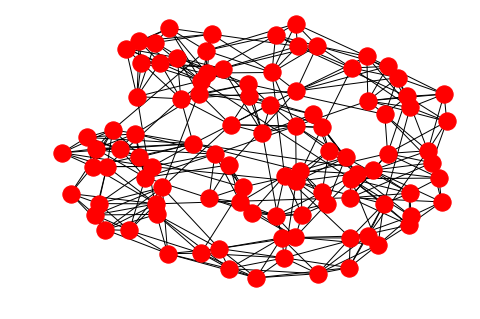

In [101]:
import pylab as plt

g3 = nx.watts_strogatz_graph(100, 8, 0.1)
nx.draw(g3)

#plt.savefig('graph.png')

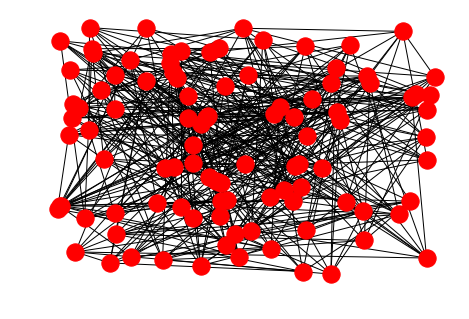

In [102]:
nx.draw_random(g3)


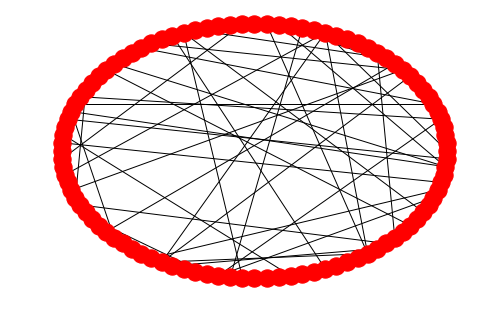

In [103]:
nx.draw_circular(g3)


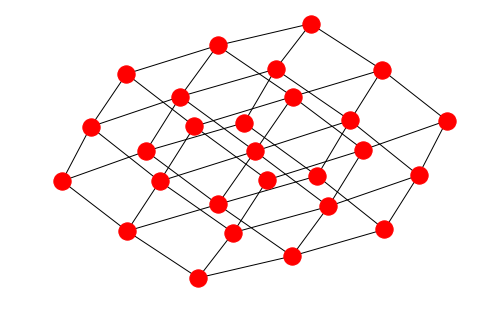

In [268]:
lattice = nx.grid_graph ([3 ,3 ,3]) # 4D , 100^4 nodes
nx.draw(lattice)

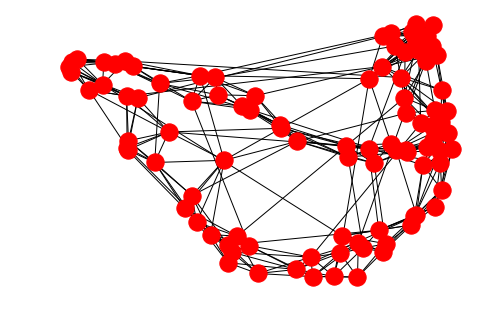

In [104]:
nx.draw_spectral(g3)

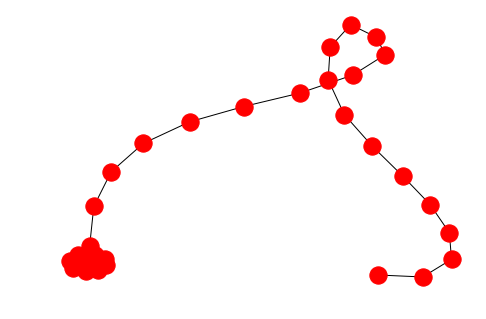

In [119]:
nx.draw(lollipop)

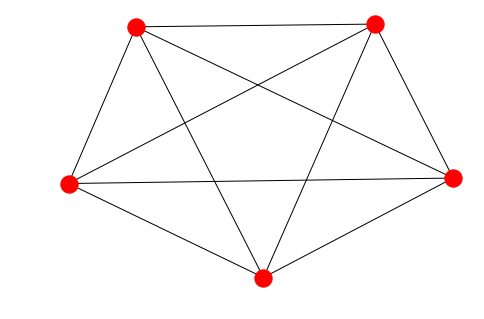

In [120]:
nx.draw(K_5)

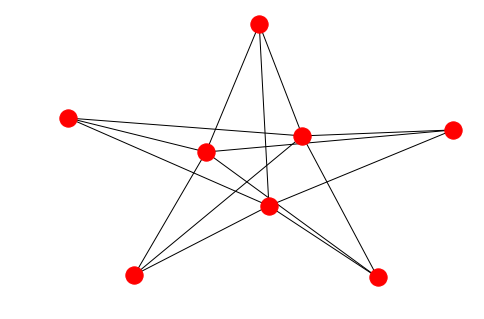

In [121]:
nx.draw(K_3_5)

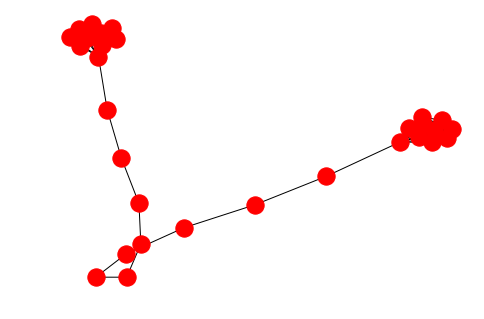

In [122]:
nx.draw(barbell)

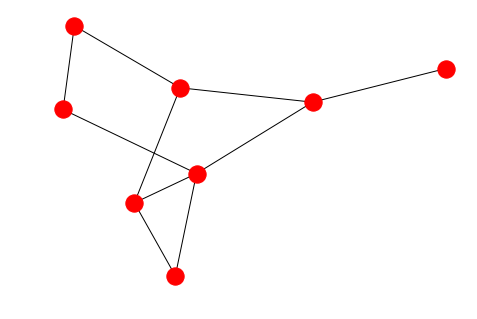

In [123]:
nx.draw(maze)

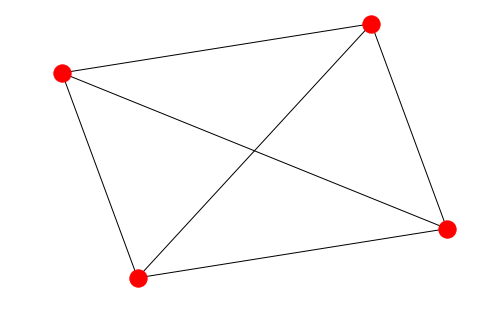

In [124]:
nx.draw(tet)

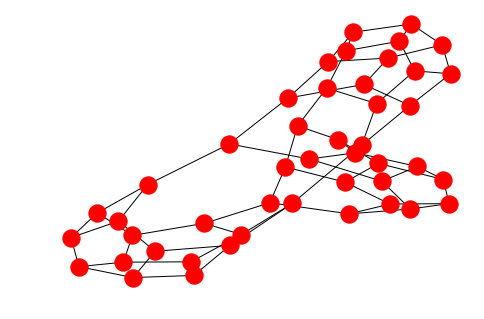

In [125]:
nx.draw(tutte)

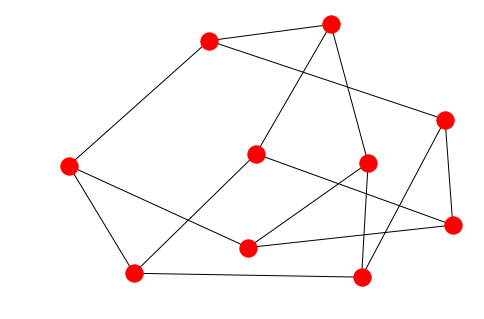

In [126]:
nx.draw(petersen)

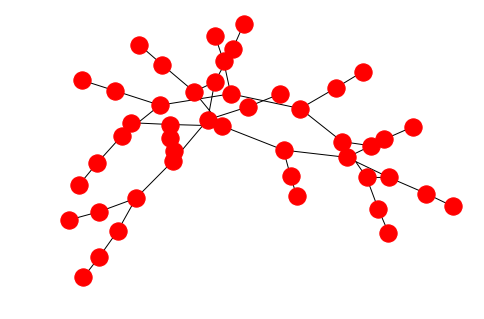

In [127]:
nx.draw(red)

## Graph analysis

### Football (networkx examples)

#### Degree distributions

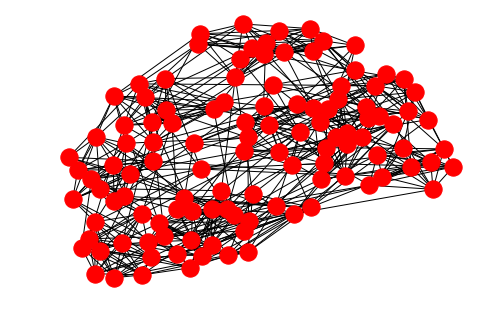

In [129]:
football = nx.read_gml('football.gml')
nx.draw(football)

In [176]:
football = football.to_directed()
print(
    "Nodes: ",football.order(),
    "\nEdges: ",football.size(),
    "\nAvg degree: ", float(football.order())/football.size(),
    "\nSCC: ", nx.number_strongly_connected_components(football),
    "\nWCC: ", nx.number_weakly_connected_components(football)
)
#in and out degress

# in degrees
print("In/out degrees")
in_degrees = football.in_degree(football.nodes())
in_degrees = [ item[1] for item in list(in_degrees) ]
in_values = sorted(set(in_degrees))
print(list(in_degrees)[:5])
print(list(in_values)[:5])
in_hist = [in_degrees.count(x) for x in in_values]

# out degrees
print("In/out degrees")
out_degrees = football.out_degree(football.nodes())
out_degrees = [ item[1] for item in list(out_degrees) ]
out_values = sorted(set(out_degrees))
out_hist = [out_degrees.count(x) for x in out_values]


plt.figure()
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-')
plt.plot(out_values, out_hist, 'bv-')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of places in Cambridge')
plt.xlim([0, 2*10^2])
#plt.savefig('football_degree_distribution.pdf')
plt.close()


Nodes:  115 
Edges:  1226 
Avg degree:  0.09380097879282219 
SCC:  1 
WCC:  1
In/out degrees
[12, 12, 12, 12, 11]
[7, 8, 9, 10, 11]
In/out degrees


In [177]:

plt.figure()
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-')
plt.loglog(out_values, out_hist, 'bv-')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of places in Cambridge')
plt.xlim([0, 2*10^2])
plt.savefig('football_degree_distribution_loglog.pdf')
plt.close()

/home/pau/.pyenv/versions/3.6.7/envs/gnn-girvan-newman/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


#### clustering coefficeint

In [187]:
football = nx.read_gml('football.gml')
# clustering coef of node 0
print(nx.clustering(football,[1,2,3]))

# clustering coeff of all nodes
clust_coefficients = nx.clustering(football)
print("clustering coefficients:",clust_coefficients)

print("\nAverage clustering coeff")
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)
print(nx.average_clustering(football))


{}
clustering coefficients: {'BrighamYoung': 0.3484848484848485, 'FloridaState': 0.4393939393939394, 'Iowa': 0.3787878787878788, 'KansasState': 0.3333333333333333, 'NewMexico': 0.41818181818181815, 'TexasTech': 0.36363636363636365, 'PennState': 0.3181818181818182, 'SouthernCalifornia': 0.3939393939393939, 'ArizonaState': 0.4727272727272727, 'SanDiegoState': 0.4727272727272727, 'Baylor': 0.4444444444444444, 'NorthTexas': 0.3111111111111111, 'NorthernIllinois': 0.3333333333333333, 'Northwestern': 0.38181818181818183, 'WesternMichigan': 0.37777777777777777, 'Wisconsin': 0.3484848484848485, 'Wyoming': 0.41818181818181815, 'Auburn': 0.34545454545454546, 'Akron': 0.4, 'VirginiaTech': 0.43636363636363634, 'Alabama': 0.36363636363636365, 'UCLA': 0.45454545454545453, 'Arizona': 0.509090909090909, 'Utah': 0.45454545454545453, 'ArkansasState': 0.2222222222222222, 'NorthCarolinaState': 0.509090909090909, 'BallState': 0.3333333333333333, 'Florida': 0.36363636363636365, 'BoiseState': 0.3333333333333

#### node centralities

In [275]:
football_components = nx.connected_component_subgraphs(football)
football_mc = list(football_components)[0]

print(nx.diameter(football_mc))

# betweenness centrality
print(nx.betweenness_centrality(football_mc))

# closeness centrality
print("\n\n",nx.closeness_centrality(football_mc))

# eigenvector centrality
print("\n\n", nx.eigenvector_centrality(football_mc))

# edge betweenness centrality
print("\n\n", nx.edge_betweenness_centrality(football_mc))

5
{'BrighamYoung': 0.07716416072874192, 'FloridaState': 0.05063475349068911, 'Iowa': 0.04416971120778149, 'KansasState': 0.03700340889581686, 'PennState': 0.03765366710219845, 'ArizonaState': 0.007191096364965973, 'SanDiegoState': 0.020354367881073906, 'Baylor': 0.0015559873951482342, 'NorthTexas': 0.0415891959230973, 'NorthernIllinois': 0.02382419198266395, 'Northwestern': 0.019010096396525754, 'WesternMichigan': 0.009058534982610906, 'Wyoming': 0.05378226446917984, 'Auburn': 0.045377754719276374, 'Akron': 0.01755869498290122, 'VirginiaTech': 0.020790195115869447, 'Alabama': 0.006141394865171091, 'Arizona': 0.0264343962136898, 'Utah': 0.023736301285925573, 'NorthCarolinaState': 0.008693371828765846, 'BallState': 0.026205753722578322, 'Florida': 0.02697028947690052, 'BoiseState': 0.022393046240011292, 'BostonCollege': 0.0, 'WestVirginia': 0.03331939439981015, 'BowlingGreenState': 0.018320535948274347, 'Michigan': 0.02712022932128913, 'Virginia': 0.022502469318153633, 'Buffalo': 0.01497

#### most centrall nodes

In [203]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items = sorted(items, reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

# apply top method to the centralities
football_components = nx.connected_component_subgraphs(football)
football_mc = list(football_components)[0]
bet_cen = nx.betweenness_centrality(football_mc)
clo_cen = nx.closeness_centrality(football_mc)
eig_cen = nx.eigenvector_centrality(football_mc)
edg_cen = nx.edge_betweenness_centrality(football_mc)

top_bet_cen = get_top_keys(bet_cen, 10)
top_clo_cen = get_top_keys(clo_cen, 10)
top_eig_cen = get_top_keys(eig_cen, 10)
top_edg_cen = get_top_keys(edg_cen, 10)
print("top betweenness centrality nodes: ",list(top_bet_cen))
print("\n top closeness centrality nodes: ",list(top_clo_cen))
print("\n top eig centrality nodes: ",list(top_eig_cen))

print(list(top_edg_cen))


top betweenness centrality nodes:  ['NotreDame', 'BrighamYoung', 'Navy', 'LouisianaTech', 'CentralMichigan', 'NewMexicoState', 'Cincinnati', 'KansasState', 'Alabama', 'Wyoming']

 top closeness centrality nodes:  ['LouisianaTech', 'Navy', 'Tulsa', 'Indiana', 'PennState', 'BrighamYoung', 'Wisconsin', 'Wyoming', 'ArkansasState', 'Cincinnati']

 top eig centrality nodes:  ['Nevada', 'SouthernMethodist', 'Tulsa', 'SouthernCalifornia', 'SanJoseState', 'FresnoState', 'Hawaii', 'Rice', 'TexasElPaso', 'Wisconsin']
[('Alabama', 'UCLA'), ('KansasState', 'BallState'), ('Missouri', 'Clemson'), ('BoiseState', 'CentralMichigan'), ('Washington', 'MiamiFlorida'), ('Wyoming', 'CentralMichigan'), ('Tulsa', 'NorthCarolina'), ('BrighamYoung', 'Syracuse'), ('Ohio', 'IowaState'), ('WestVirginia', 'Idaho')]


#### draw with geoloc informaation?

In [216]:
# add coordinates to names of cities
# draw with this info

print(football.order())
# get geocode from cities name in Locations-en
# get long-lat with geocode
# do for each 
nodes_list = list(football.nodes())
print(nodes_list[:10])



# generate geoid, lat, long dict
#open geolite2 ip-lat-log file
geocords = open("GeoLite2-City-Blocks-IPv4.csv","r")
geoid = {}
print(geocords.readline())
print(geocords.readline())
print(geocords.readline())
for line in geocords.readlines():
    line = line.split(",")
    geoid[line[1]]={'lat':line[7],'long':line[8]}
geocords.close()    

# generate city-geoid dict
#open geolite2 city file
cityids = open("GeoLite2-City-Locations-en.csv","r")
print(cityids.readline())
print(cityids.readline())
print(cityids.readline())
print(cityids.readline())
cities = {}
for line in cityids.readlines():
    line = line.split(",")
    cities[line[10]] = line[0]
cityids.close()


115
['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState']
network,geoname_id,registered_country_geoname_id,represented_country_geoname_id,is_anonymous_proxy,is_satellite_provider,postal_code,latitude,longitude,accuracy_radius

1.0.0.0/24,8348084,2077456,,0,0,5127,-34.7994,138.6871,50

1.0.1.0/24,1811017,1814991,,0,0,,24.4798,118.0819,50

geoname_id,locale_code,continent_code,continent_name,country_iso_code,country_name,subdivision_1_iso_code,subdivision_1_name,subdivision_2_iso_code,subdivision_2_name,city_name,metro_code,time_zone,is_in_european_union

49518,en,AF,Africa,RW,Rwanda,,,,,,,Africa/Kigali,0

49747,en,AF,Africa,SO,Somalia,BK,Bakool,,,Oddur,,Africa/Mogadishu,0

51537,en,AF,Africa,SO,Somalia,,,,,,,Africa/Mogadishu,0



In [236]:

post_dict={}
for city, code in cities.items():
    if city=='':
        continue
    for node in nodes_list:
        if node.lower().startswith(city.lower()):
            try:
                post_dict[node]=(geoid[code]['lat'], geoid[code]['long'])
                
            except:
                print(" not found: ",node," ", city)
            
            
# remove nodes that have no position
removal_list = []
for node in football.nodes():
    if node not in post_dict.keys():
        print("no geoloc for ",node)
        removal_list.append(node)

for node in removal_list:
    football.remove_node(node)
        
    
print([(k,v) for k,v in post_dict.items() if k.startswith('A')])


 not found:  MiamiOhio   Miami
 not found:  MiamiFlorida   Miami
[('Auburn', ('49.5527', '10.0653')), ('Alabama', ('45.7607', '11.0046')), ('AlabamaBirmingham', ('45.7607', '11.0046')), ('ArizonaState', ('-35.7167', '-65.3000')), ('Arizona', ('-35.7167', '-65.3000')), ('Akron', ('40.1803', '-103.2259'))]


In [242]:
plt.figure()
plt.grid(False)

plt.xlim([-200, 200])
plt.ylim([-200, 200])
nx.draw(football, pos=post_dict, with_labels=False, node_size=2)
plt.savefig('football_graph_with_lat_long.pdf')
plt.close()

In [244]:
football['Alabama']

AtlasView({'Auburn': {}, 'CentralFlorida': {}, 'Vanderbilt': {}, 'Tennessee': {}, 'LouisianaState': {}})

### Matplotlib example

/home/pau/.pyenv/versions/3.6.7/envs/gnn-girvan-newman/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1cc8050588>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/pau/.pyenv/versions/3.6.7/envs/gnn-girvan-newman/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1caa09f4e0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


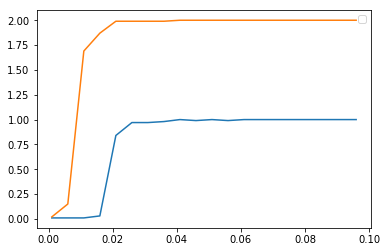

In [279]:
import numpy as np
def get_phase_curve(ps, n):
    cs = []
    for p in ps:
        G = nx.gnp_random_graph(n,p)
        c = list(nx.connected_component_subgraphs(G))[0].order()
        cs.append(float(c)/100)
    return cs


ps = np.arange(0.001, 0.1, 0.005)
cs = get_phase_curve(ps, 100)
plt.loglog( ps , cs ) # also see semilog
plt.savefig( 'phase_log_log.pdf')

plt.clf()
h_100 = plt.plot( ps , get_phase_curve(ps,100) )
h_200 = plt.plot( ps , get_phase_curve(ps,200) )
# using latex inside the legend
plt.legend([ h_100 , h_200 ] ,[ '$$ n =100 $$' ,'$$ n =200 $$' ])
plt.savefig('phase2.pdf')